<h4>Interpolaci&oacute;n de Lagrange</h4>

In [1]:
f(x)=x*sin(1/x)

In [2]:
L = zip([n*0.1 for n in srange(1,11)],[f(n*0.1).n() for n in srange(1,11)]);L

[(0.100000000000000, -0.0544021110889370),
 (0.200000000000000, -0.191784854932628),
 (0.300000000000000, -0.0571703888626455),
 (0.400000000000000, 0.239388857641583),
 (0.500000000000000, 0.454648713412841),
 (0.600000000000000, 0.597244774651059),
 (0.700000000000000, 0.692932153460487),
 (0.800000000000000, 0.759187695484469),
 (0.900000000000000, 0.806572980926961),
 (1.00000000000000, 0.841470984807897)]

In [3]:
R = PolynomialRing(RR,'x')

In [4]:
Lag = R.lagrange_polynomial(L);Lag

3221.47948876818*x^9 - 17006.0721719921*x^8 + 38705.9902994724*x^7 - 49611.8962430397*x^6 + 39192.3365760792*x^5 - 19577.6498831928*x^4 + 6076.06702208438*x^3 - 1097.08223522403*x^2 + 101.351683390192*x - 3.68306536093841

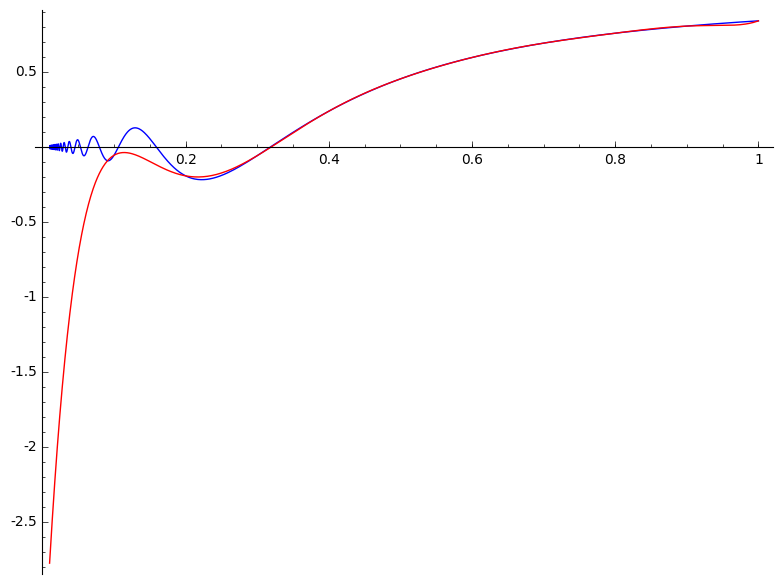

In [5]:
plot(f,0.01,1)+plot(Lag,0.01,1,color='red')

<p>&iquest;Podemos forzar al polinomio interpolador a seguir las oscilaciones de $f$?</p>

In [6]:
L1 = zip([n*0.01 for n in srange(1,11)],[f(n*0.01).n() for n in srange(1,11)]);L1

[(0.0100000000000000, -0.00506365641109759),
 (0.0200000000000000, -0.00524749707407858),
 (0.0300000000000000, 0.0282158872988629),
 (0.0400000000000000, -0.00529407000391092),
 (0.0500000000000000, 0.0456472625363814),
 (0.0600000000000000, -0.0491068351894767),
 (0.0700000000000000, 0.0692290981703785),
 (0.0800000000000000, -0.00530575178809605),
 (0.0900000000000000, -0.0893999738209419),
 (0.100000000000000, -0.0544021110889370)]

In [7]:
Lag1 = R.lagrange_polynomial(L1);Lag1

-5.15258697398176e13*x^9 + 2.54089085015143e13*x^8 - 5.36070933151227e12*x^7 + 6.32307098683251e11*x^6 - 4.57125854939100e10*x^5 + 2.08732396006314e9*x^4 - 5.97246113186651e7*x^3 + 1.02201327935629e6*x^2 - 9357.03112086184*x + 34.2053605136549

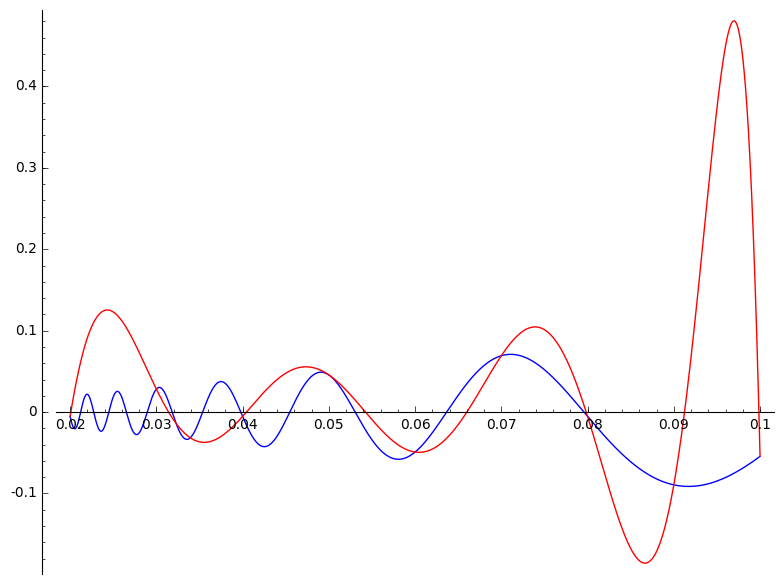

In [8]:
plot(f,0.02,0.1)+plot(Lag1,0.02,0.1,color='red')

<p>Vemos algo que deb&iacute;a ser claro antes de empezar: forzando al polinomio a coincidir con la funci&oacute;n en ciertos puntos no se consigue f&aacute;cilmente que &nbsp;el polinomio se acerque a la funci&oacute;n.</p>

<h4>Diferencias divididas (Newton)</h4>

In [9]:
New = R.divided_difference(L);New

[-0.0544021110889370,
 -1.37382743843691,
 13.5998604956836,
 -18.3420715799045,
 -55.4965590365788,
 320.892924212446,
 -860.877445163556,
 1645.22664606222,
 -2509.41447253527,
 3221.47948876818]

In [10]:
P = sum([New[j]*prod([x-L[k][0] for k in srange(j)])for j in srange(len(L))]);P

3221.47948876818*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)*(x - 0.400000000000000)*(x - 0.500000000000000)*(x - 0.600000000000000)*(x - 0.700000000000000)*(x - 0.800000000000000)*(x - 0.900000000000000) - 2509.41447253527*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)*(x - 0.400000000000000)*(x - 0.500000000000000)*(x - 0.600000000000000)*(x - 0.700000000000000)*(x - 0.800000000000000) + 1645.22664606222*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)*(x - 0.400000000000000)*(x - 0.500000000000000)*(x - 0.600000000000000)*(x - 0.700000000000000) - 860.877445163556*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)*(x - 0.400000000000000)*(x - 0.500000000000000)*(x - 0.600000000000000) + 320.892924212446*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)*(x - 0.400000000000000)*(x - 0.500000000000000) - 55.4965590365788*(x - 0.100000000000000)*(x - 0.200000000000000)*

In [11]:
expand(P)

3221.47948876818*x^9 - 17006.0721719921*x^8 + 38705.9902994724*x^7 - 49611.8962430397*x^6 + 39192.3365760792*x^5 - 19577.6498831928*x^4 + 6076.06702208438*x^3 - 1097.08223522403*x^2 + 101.351683390192*x - 3.68306536093841

In [12]:
R(expand(P))-Lag

-3.63797880709171e-12*x^8 - 7.27595761418343e-12*x^5 + 2.27373675443232e-13*x^2 - 1.42108547152020e-14*x

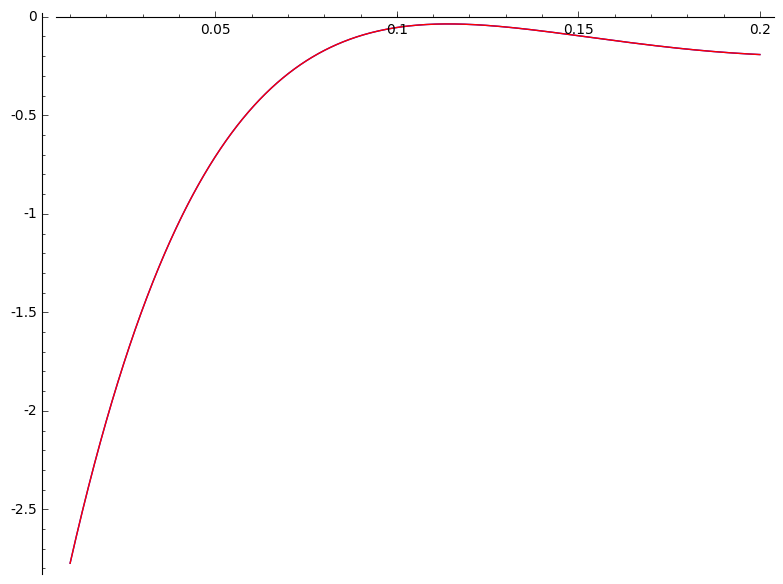

In [13]:
plot(P,0.01,0.2)+plot(Lag,0.01,0.2,color='red')